In [11]:
import csv
import pandas as pd
from sklearn.decomposition import PCA
from vega import VegaLite

In [2]:
INPUT = './amds_vectors.csv'

In [3]:
d = pd.read_csv(INPUT)

In [4]:
d.head()

legislature  text_ln     id  nb_signataires  concurrents  \
0           15      250  32772               2            8   
1           15     1381      5              14            1   
2           15      484  32776              15           33   
3           15     2207     12               1            3   
4           15      149     15               3            7   

                                         signataires  expose_ln         sort  \
0                              M. Sommer, M. Barbier        587       Retiré   
1  M. Hetzel,  M. Marleix, M. Straumann, M. Quent...       1132       Retiré   
2  Mme Fontaine-Domeizel,  M. Taquet, Mme Bagarry...        644       Retiré   
3                                          M. Hetzel       1720  Non soutenu   
4                M. Viala,  M. Cinieri, M. Straumann        229  Non soutenu   

   duplicates auteur_groupe_acronyme groupes majorite_opposition  \
0           1                   LREM    LREM            majorité   
1           1                     LR      LR          opposition   
2           1                   LREM    LREM            majorité   
3           1                     LR      LR          opposition   
4           1                     LR      LR          opposition   

  signataire_special  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [8]:
X = d[['concurrents', 'nb_signataires', 'text_ln', 'expose_ln']]

In [9]:
X.head()

concurrents  nb_signataires  text_ln  expose_ln
0            8               2      250        587
1            1              14     1381       1132
2           33              15      484        644
3            3               1     2207       1720
4            7               3      149        229

In [10]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X)
Y

array([[-300.79059931, -269.92642821],
       [ 876.91833167,  165.02384594],
       [ -62.42567937, -235.33834018],
       ...,
       [-413.97882459, -550.26930819],
       [-281.26813203, -770.06191925],
       [-100.14845631,  -51.83208078]])

In [47]:
pca.components_

array([[ 6.63528987e-05,  2.19921274e-04,  9.95466978e-01,
         9.51075301e-02],
       [ 3.43355573e-03,  1.24167477e-03, -9.51073973e-02,
         9.95460322e-01]])

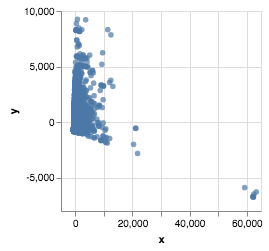

In [40]:
data = [{
    'x': r[0],
    'y': r[1],
    'index': i,
    'concurrents': X.loc[i]['concurrents'],
    'nb_signataires': X.loc[i]['nb_signataires'],
    'expose_ln': X.loc[i]['expose_ln'],
    'text_ln': X.loc[i]['text_ln']
} for i, r in enumerate(Y) if i != 11619 and i != 7839]

VegaLite({
    'mark': 'circle',
    'encoding': {
        'x': {'type': 'quantitative', 'field': 'x'},
        'y': {'type': 'quantitative', 'field': 'y'},
        'tooltip': [
            {'type': 'quantitative', 'field': 'x'},
            {'type': 'quantitative', 'field': 'y'},
            {'type': 'nominal', 'field': 'index'},
            {'type': 'quantitative', 'field': 'concurrents'},
            {'type': 'quantitative', 'field': 'nb_signataires'},
            {'type': 'quantitative', 'field': 'expose_ln'},
            {'type': 'quantitative', 'field': 'text_ln'}
        ]
    }
}, data)

In [37]:
X.loc[7839]

concurrents            1
nb_signataires         1
text_ln           133196
expose_ln            288
Name: 7839, dtype: int64

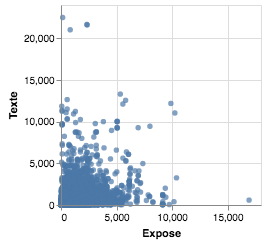

In [51]:
data = [{
    'x': X.loc[i]['expose_ln'],
    'y': X.loc[i]['text_ln'],
    'index': i,
    'concurrents': X.loc[i]['concurrents'],
    'nb_signataires': X.loc[i]['nb_signataires'],
    'expose_ln': X.loc[i]['expose_ln'],
    'text_ln': X.loc[i]['text_ln']
} for i, r in enumerate(Y) if X.loc[i]['text_ln'] < 30_000]

VegaLite({
    'mark': 'circle',
    'encoding': {
        'x': {'type': 'quantitative', 'field': 'x', 'axis': {'title': 'Expose'}},
        'y': {'type': 'quantitative', 'field': 'y', 'axis': {'title': 'Texte'}},
        'tooltip': [
            {'type': 'quantitative', 'field': 'x'},
            {'type': 'quantitative', 'field': 'y'},
            {'type': 'nominal', 'field': 'index'},
            {'type': 'quantitative', 'field': 'concurrents'},
            {'type': 'quantitative', 'field': 'nb_signataires'},
            {'type': 'quantitative', 'field': 'expose_ln'},
            {'type': 'quantitative', 'field': 'text_ln'}
        ]
    }
}, data)

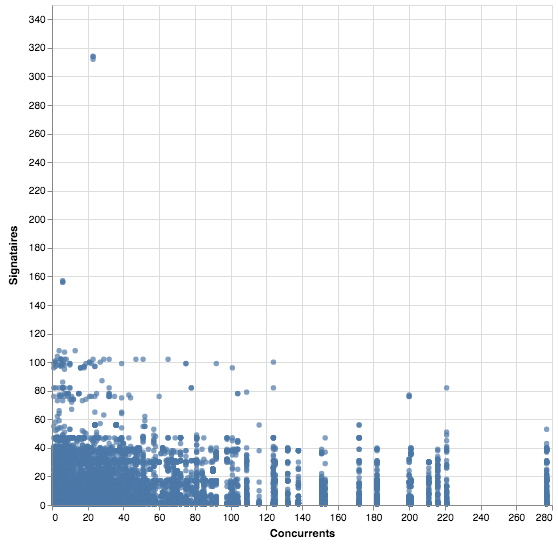

In [57]:
data = [{
    'x': X.loc[i]['concurrents'],
    'y': X.loc[i]['nb_signataires'],
    'index': i,
    'concurrents': X.loc[i]['concurrents'],
    'nb_signataires': X.loc[i]['nb_signataires'],
    'expose_ln': X.loc[i]['expose_ln'],
    'text_ln': X.loc[i]['text_ln']
} for i, r in enumerate(Y) if X.loc[i]['text_ln'] < 30_000]

VegaLite({
    'mark': 'circle',
    'encoding': {
        'x': {'type': 'quantitative', 'field': 'x', 'axis': {'title': 'Concurrents'}},
        'y': {'type': 'quantitative', 'field': 'y', 'axis': {'title': 'Signataires'}},
        'tooltip': [
            {'type': 'quantitative', 'field': 'x'},
            {'type': 'quantitative', 'field': 'y'},
            {'type': 'nominal', 'field': 'index'},
            {'type': 'quantitative', 'field': 'concurrents'},
            {'type': 'quantitative', 'field': 'nb_signataires'},
            {'type': 'quantitative', 'field': 'expose_ln'},
            {'type': 'quantitative', 'field': 'text_ln'}
        ]
    },
    'height': 500,
    'width': 500
}, data)